In [1]:
#!pip install imblearn
import warnings
warnings.filterwarnings('ignore')


In [2]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist



font = { 'family' : 'normal',
         'weight' : 'bold',
         'size'   : 22 }
 
matplotlib.rc('font', **font)

In [3]:
df = pd.read_csv('course_730.csv', engine='python')

df = df.drop([list(df)[0], list(df)[-3], 'final_score', 'group'], axis=1)
#df = df.drop(['hw1_score', 'hw2_score', 'hw3_score', 'student_id'], axis=1)
df = df.drop(['student_id', 'hw2_score', 'hw3_score'], axis=1)

df = df.drop(['HW1_C', 'HW1_R', 'HW1_W', 'HW1_E'], axis=1)
df = df.drop(['HW2_C', 'HW2_R', 'HW2_W', 'HW2_E'], axis=1)
df = df.drop(['HW3_C', 'HW3_R', 'HW3_W', 'HW3_E'], axis=1)

df = df.rename(index=str, columns={list(df)[-1]: "label_2",
                              list(df)[-2]: "label_1"})
df = df[df.HW1.notna()]
df = df[df.HW2.notna()]
df = df[df.HW3.notna()]
df = df[df.HW3.notna()]
df = df[df.HW2 != 'error']
df = df[df.label_2 != '?�修']
df = df[df.label_1.notna()]

df.head()

,HW1,HW2,HW3,hw1_score,w1_onlineDays,w1_onlineCount,w1_onlineTime,w1_passCount,w1_failCount,w1_SyntaxError,...,w3_onlineTime,w3_passCount,w3_failCount,w3_SyntaxError,w3_NameError,w3_IndentationError,w3_ValueError,w3_TypeError,label_1,label_2
0,-15.24,-2.25,-7.47,25.0,0.0,0.0,0.000,0.0,0.0,0.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,93.0,75
5,-15.26,-2.62,-7.47,25.0,2.0,1.0,6002.317,62.0,38.0,11.0,...,5096.197,71.0,8.0,2.0,5.0,0.0,1.0,0.0,105.0,85
8,-13.5,-8.95,-8.41,25.0,1.0,1.0,3470.740,14.0,18.0,14.0,...,3098.358,16.0,6.0,5.0,0.0,1.0,0.0,0.0,88.0,70
9,-14.21,0.9,-5.38,25.0,1.0,1.0,4327.470,58.0,27.0,8.0,...,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,77.0,68
12,-11.3,-4.23,-11.76,25.0,1.0,1.0,3871.781,36.0,25.0,16.0,...,5923.999,41.0,14.0,1.0,9.0,0.0,1.0,2.0,64.0,66


In [4]:
feature_list = list(df)
feature_list

['HW1',
 'HW2',
 'HW3',
 'hw1_score',
 'w1_onlineDays',
 'w1_onlineCount',
 'w1_onlineTime',
 'w1_passCount',
 'w1_failCount',
 'w1_SyntaxError',
 'w1_NameError',
 'w1_IndentationError',
 'w1_ValueError',
 'w1_TypeError',
 'w2_onlineDays',
 'w2_onlineCount',
 'w2_onlineTime',
 'w2_passCount',
 'w2_failCount',
 'w2_SyntaxError',
 'w2_NameError',
 'w2_IndentationError',
 'w2_ValueError',
 'w2_TypeError',
 'w3_onlineDays',
 'w3_onlineCount',
 'w3_onlineTime',
 'w3_passCount',
 'w3_failCount',
 'w3_SyntaxError',
 'w3_NameError',
 'w3_IndentationError',
 'w3_ValueError',
 'w3_TypeError',
 'label_1',
 'label_2']

In [5]:

hw1_df = df[feature_list[3:14]]

<Figure size 1080x1080 with 0 Axes>

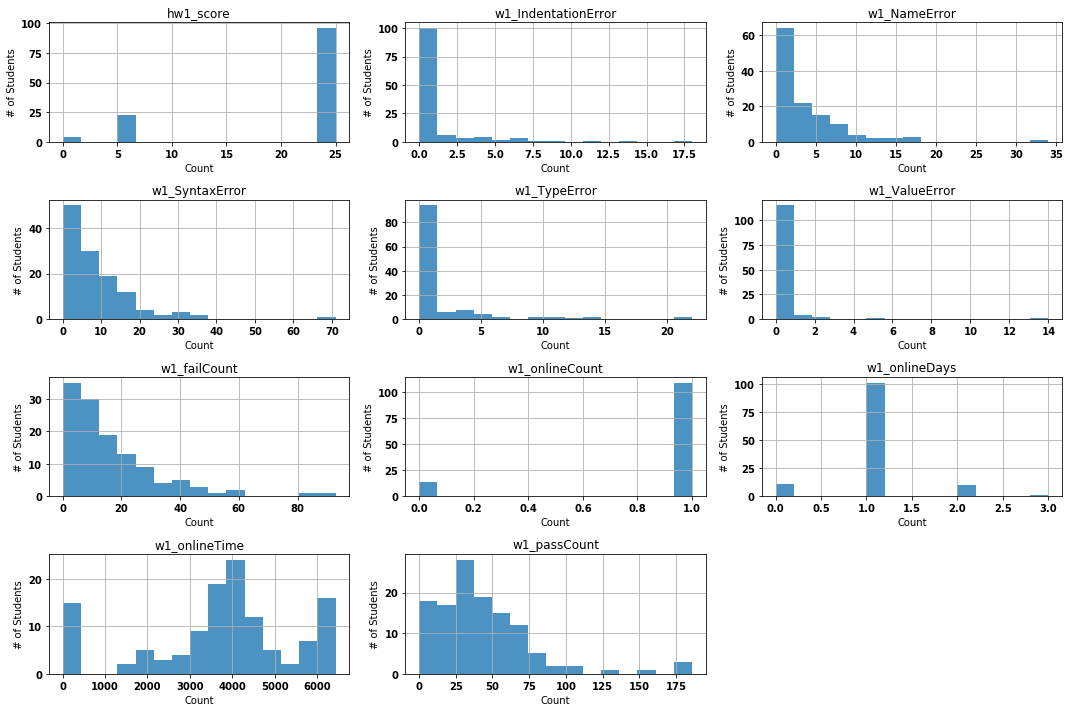

In [6]:
plt.figure(figsize=(15, 15))
ax = hw1_df.hist(alpha=0.8, bins=15, figsize=(15, 10))
#for x in ax:
#     x.set_title('x')

for array in ax:
    for subplot in array:
        subplot.set_ylabel('# of Students')
        subplot.set_xlabel('Count')

plt.tight_layout()
plt.savefig('svm_conf.png', dpi=400)

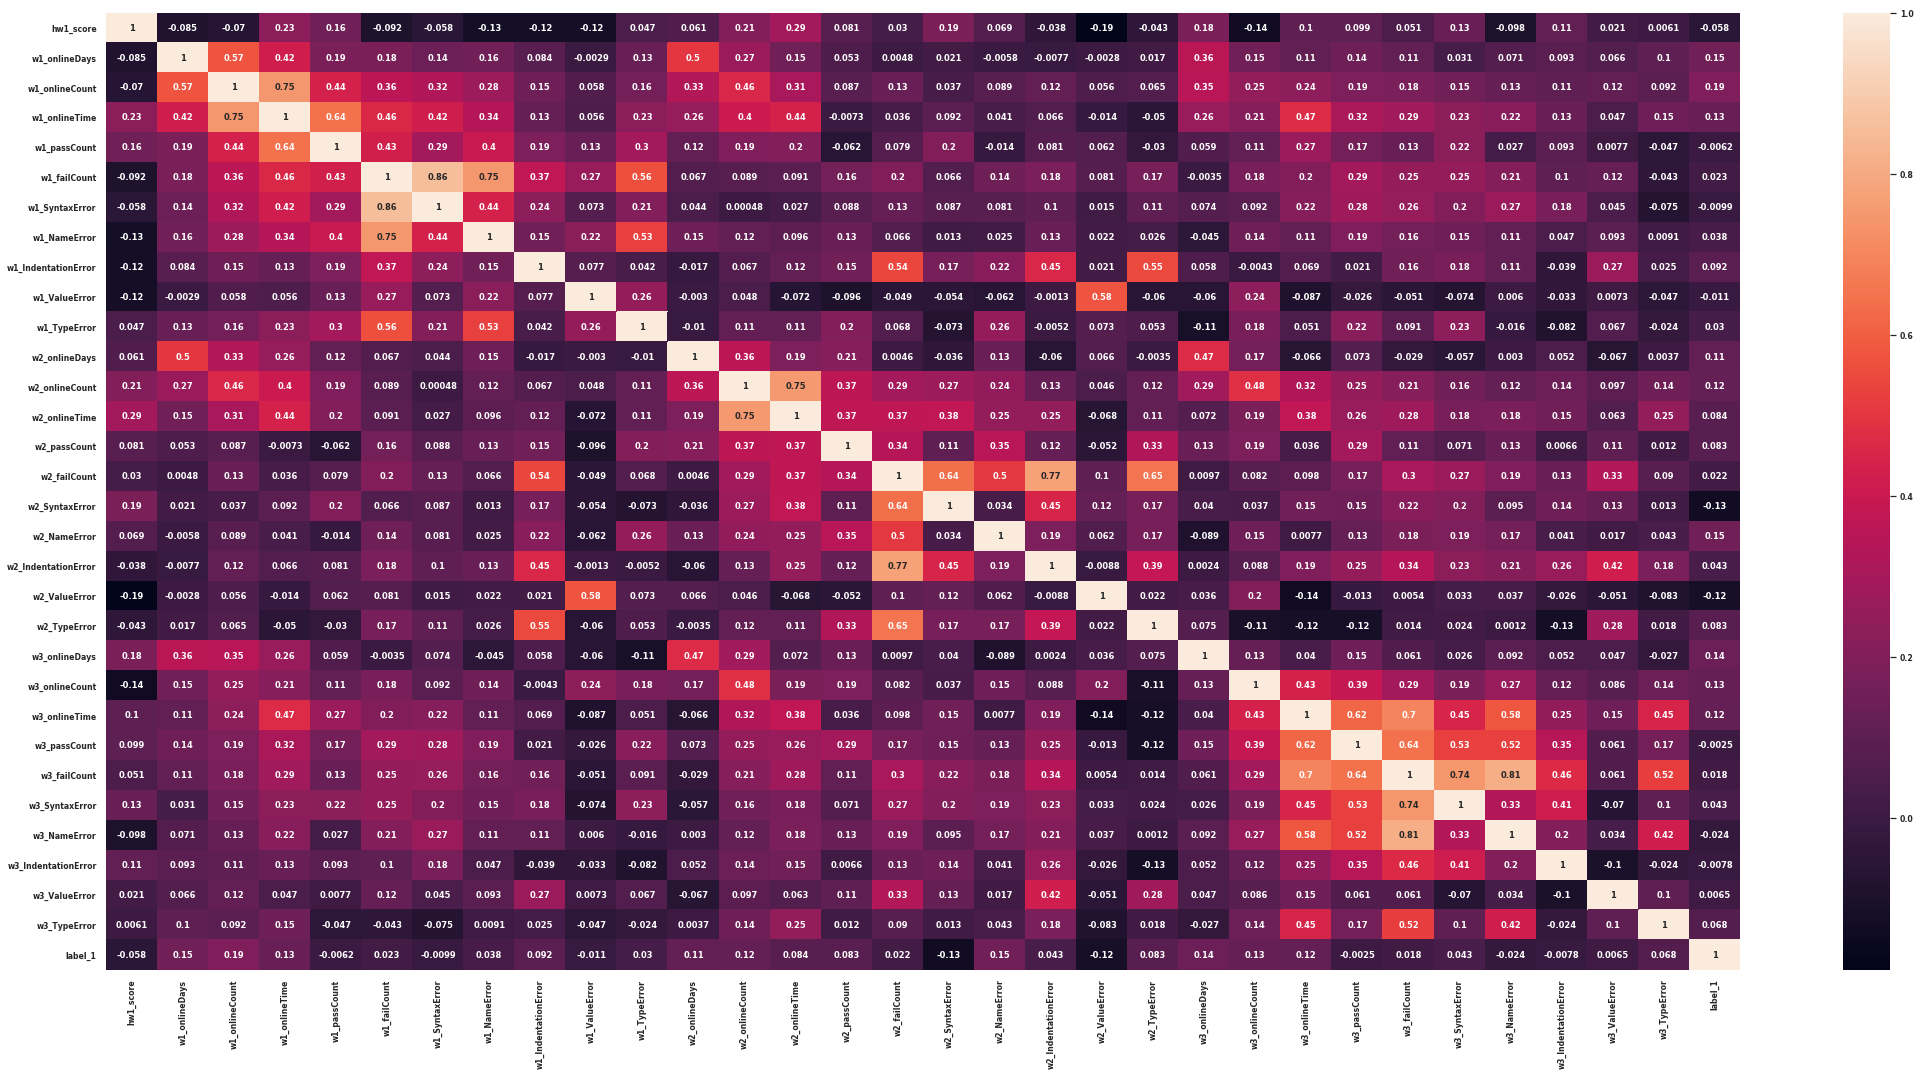

In [7]:
import seaborn as sns

Var_Corr = df.corr()
# plot the heatmap and annotation on it
sns.set(rc={'figure.figsize':(30, 15)})
sns.set(font_scale=0.7)
sns.heatmap(Var_Corr, xticklabels=Var_Corr.columns, yticklabels=Var_Corr.columns, annot=True)

plt.tight_layout()
plt.savefig('svm_conf.png', dpi=400)

In [8]:
list(df)

['HW1',
 'HW2',
 'HW3',
 'hw1_score',
 'w1_onlineDays',
 'w1_onlineCount',
 'w1_onlineTime',
 'w1_passCount',
 'w1_failCount',
 'w1_SyntaxError',
 'w1_NameError',
 'w1_IndentationError',
 'w1_ValueError',
 'w1_TypeError',
 'w2_onlineDays',
 'w2_onlineCount',
 'w2_onlineTime',
 'w2_passCount',
 'w2_failCount',
 'w2_SyntaxError',
 'w2_NameError',
 'w2_IndentationError',
 'w2_ValueError',
 'w2_TypeError',
 'w3_onlineDays',
 'w3_onlineCount',
 'w3_onlineTime',
 'w3_passCount',
 'w3_failCount',
 'w3_SyntaxError',
 'w3_NameError',
 'w3_IndentationError',
 'w3_ValueError',
 'w3_TypeError',
 'label_1',
 'label_2']

In [9]:
#X = np.array(df[['w3_onlineTime', 'w3_passCount', 'w3_failCount', 'w3_SyntaxError', 'w3_NameError']])
X = np.array(df)

In [10]:
# k means determine k
plt.rcParams.update({'font.size': 16})
plt.figure(figsize=(10, 5))

distortions = []
K = range(1,5)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(X)
    kmeanModel.fit(X)
    distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'seuclidean'), axis=1)) / X.shape[0])

# metric : str or callable, optional
#     The distance metric to use.  If a string, the distance function can be
#     'braycurtis', 'canberra', 'chebyshev', 'cityblock', 'correlation',
#     'cosine', 'dice', 'euclidean', 'hamming', 'jaccard', 'kulsinski',
#     'mahalanobis', 'matching', 'minkowski', 'rogerstanimoto', 'russellrao',
#     'seuclidean', 'sokalmichener', 'sokalsneath', 'sqeuclidean',
#     'wminkowski', 'yule'.
    
lablestring = 'optimal value for k'
plt.annotate(lablestring, xy=(3, 11), xytext=(3, 15),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
    
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
#plt.title('The Elbow Method showing the optimal k')
plt.show()

ValueError: could not convert string to float: 'error'

<Figure size 720x360 with 0 Axes>